**CHECKPOINT - 1: Data Cleaning** 

In [1]:
import pandas as pd;
import numpy as np;

In [2]:
#import companies.txt file as a dataframe

#ImpNote: 'Assignment' is a local folder in my system where I have place companies.txt & rounds2.csv file

companies = pd.read_csv('Assignment/companies.txt',sep='\t', encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#import rounds2.csv file as a dataframe

rounds2 = pd.read_csv('Assignment/rounds2.csv',encoding = "ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#To maintain uniformity in data the 'company_permalink' column in rounds2 dataframe is converted to lowercase
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#Count the unique values in 'company_permalink' column in rounds2 dataframe
uniqueCompaniesInRounds = rounds2['company_permalink'].nunique(dropna=True)
print(uniqueCompaniesInRounds)

66370


In [6]:
#To maintain uniformity in data the 'company_permalink' column in companies dataframe is converted to lowercase
companies['permalink']=companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
#Count the unique values in 'company_permalink' column in rounds2 dataframe
uniqueCompaniesInCompanies = companies['permalink'].nunique(dropna=True)
print(uniqueCompaniesInCompanies)

66368


In [8]:
#merging companies & rounds2 dataframe
master_frame = pd.merge(companies, rounds2,
                        left_on='permalink',
                        right_on='company_permalink',  
                        how='left')

#observation after merging companies & rounds2
master_frame.shape

(114947, 16)

**CHECKPOINT 2: Investment Analysis**

In [9]:
#Investment Analysis on master_frame dataframe
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [10]:
# Grouping: First, we will group the 'master_frame' dataframe by funding_round_type
df_groupby_fundingtype = master_frame.groupby('funding_round_type')
df_groupby_fundingtype

In [11]:
# To find the average funding amount of venture type we have to apply the aggregate function 'mean'
df_groupby_fundingtype['raised_amount_usd'].mean().round()

funding_round_type
angel                       958694.0
convertible_note           1453439.0
debt_financing            17043526.0
equity_crowdfunding         538368.0
grant                      4300576.0
non_equity_assistance       411203.0
post_ipo_debt            168704572.0
post_ipo_equity           82182494.0
private_equity            73308593.0
product_crowdfunding       1363131.0
secondary_market          79649630.0
seed                        719780.0
undisclosed               19242370.0
venture                   11748949.0
Name: raised_amount_usd, dtype: float64

In [12]:
#Considering the **venture** investment suitable for Sparks Fund, master_frame is filtered

filtered_master_frame = master_frame.loc[master_frame.funding_round_type =='venture']

In [13]:
filtered_master_frame.head(50)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0


In [14]:
filtered_master_frame.shape

(55493, 16)

**CHECKPOINT 3: Country Analysis**

In [15]:
## Grouping: First, we will group the 'filtered_master_frame' dataframe by country_code
grouped=pd.DataFrame(filtered_master_frame.groupby(['country_code'])
                     .raised_amount_usd.sum()
                     .sort_values(ascending=False))

In [16]:
grouped.shape

(103, 1)

In [17]:
grouped.head()

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09


In [18]:
#Creating the top9 DataFrame
top9 = pd.DataFrame(grouped.head(9))

In [19]:
#Display top 9 Countries in the descending order of  "raised_amount_usd"

top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


**CHECKPOINT 4: Sector Analysis 1**

In [20]:
#import rounds2.csv file as a dataframe
sector_mapping = pd.read_csv('Assignment/mapping.csv',encoding = "ISO-8859-1")
sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [21]:
sector_mapping = sector_mapping.melt(id_vars="category_list",var_name="main_category")

In [22]:
sector_mapping

,category_list,main_category,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [23]:
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0) ]
sector_mapping

,category_list,main_category,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [24]:
# sector_mapping=sector_mapping.drop(columns="value")
sector_mapping

,category_list,main_category,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [25]:
filtered_master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114932,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114934,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
114935,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0
114939,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0


In [26]:
#Creating a new dataframe from 'category_list' column in 'filtered_master_frame' by splitting the values over delimiter '|' 
#This is done since the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |)
#As a part of business rule,the first string before the vertical bar will be considered the primary sector

category_df = filtered_master_frame["category_list"].str.split("|", n = 4, expand = True) 

In [27]:
# A new data frame **category_df** was returned by the split() function where the each column gives a subsector splitted over '|'
#Here the first column [0] will be considered as the **primary sector**

category_df

,0,1,2,3,4
0,Media,None,None,None,None
1,Application Platforms,Real Time,Social Network Media,None,None
3,Apps,Games,Mobile,None,None
4,Curated Web,None,None,None,None
5,Software,None,None,None,None
...,...,...,...,...,...
114932,E-Commerce,None,None,None,None
114934,Biotechnology,None,None,None,None
114935,Biotechnology,None,None,None,None
114939,Enterprise Software,None,None,None,None


In [28]:
# Here we add the column 'primary_sector' to the 'filtered_master_dataframe' from the above dataframe i.e
#Since we only need the "primary sector" from 'category_df', we use the column [0] of 'category_df'

filtered_master_frame['primary_sector']=category_df[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
filtered_master_frame.shape

(55493, 17)

In [30]:
filtered_master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114932,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce
114934,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,Biotechnology
114935,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0,Biotechnology
114939,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0,Enterprise Software


In [31]:
#Here we can see a new column "primary_sector" is created as below with the following values

filtered_master_frame['primary_sector']

0                         Media
1         Application Platforms
3                          Apps
4                   Curated Web
5                      Software
                  ...          
114932               E-Commerce
114934            Biotechnology
114935            Biotechnology
114939      Enterprise Software
114944                      NaN
Name: primary_sector, Length: 55493, dtype: object

In [32]:
#---Merging the 'filtered_data_frame' with the "sector_mapping" dataframe 
#----in order to know the mapping between the primary_sector and main_sector 

merged_df = pd.merge(filtered_master_frame,sector_mapping, how='inner',left_on='primary_sector',right_on='category_list')

In [33]:
merged_df

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_category,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment,1
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment,1
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Media,Entertainment,1
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51930,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.0,Tracking,Tracking,Others,1
51931,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,Tracking,Tracking,Others,1
51932,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,Tracking,Tracking,Others,1
51933,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,Tracking,Tracking,Others,1


In [34]:
#dropping the column "category_list_y" as it has similar values as "primary_sector" column
merged_df.drop(columns =["category_list_y"], inplace = True) 

In [35]:
#Display the final "merged_df" dataframe after merging and dropping the redundant columns

merged_df

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment,1
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment,1
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment,1
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51930,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.0,Tracking,Others,1
51931,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,Tracking,Others,1
51932,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,Tracking,Others,1
51933,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,Tracking,Others,1


**Checkpoint 5: Sector Analysis 2**

In [36]:
# Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. 
# The three data frames should contain:

# All the columns of the master_frame along with the primary sector and the main sector

# The total number (or count) of investments for each main sector in a separate column

# The total amount invested in each main sector in a separate column


In [37]:
#top9 countries
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


Hence the top 3 countries are 
#1- USA
#2- GBR
#3- IND

In [38]:
#Creating D1 dataframe for country = USA

D1 = merged_df.loc[(merged_df.country_code == "USA")
                   & (merged_df.raised_amount_usd >= 5000000.0) 
                   & (merged_df.raised_amount_usd <= 15000000.0), :]

D1

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,1
16,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Entertainment,1
25,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Entertainment,1
26,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Entertainment,1
36,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51908,/organization/thisnext,ThisNext,http://www.thisnext.com,Social Buying|Social Media,operating,USA,CA,Los Angeles,Santa Monica,01-12-2005,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,B,01-01-2008,5000000.0,Social Buying,"Social, Finance, Analytics, Advertising",1
51911,/organization/thredhq,Thredhq,https://thredhq.com/,Social + Mobile + Local|Social Network Media,operating,USA,CA,SF Bay Area,Berkeley,01-01-2012,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,A,18-09-2013,5000000.0,Social + Mobile + Local,"Social, Finance, Analytics, Advertising",1
51921,/organization/user-interface,User Interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8250000.0,User Interface,Others,1
51925,/organization/washio,Washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10500000.0,Service Industries,Others,1


In [39]:
# The total amount invested in each main sector in a separate column

TotalAmnt_D1 = pd.DataFrame(D1.groupby(['main_category']).raised_amount_usd.sum())  


In [40]:
TotalAmnt_D1

,raised_amount_usd
main_category,
Automotive & Sports,1.454104e+09
Blanks,7.647633e+08
Cleantech / Semiconductors,2.118100e+10
Entertainment,5.000213e+09
Health,8.200859e+09
Manufacturing,7.258553e+09
"News, Search and Messaging",1.379682e+10
Others,2.608928e+10
"Social, Finance, Analytics, Advertising",1.668070e+10


In [41]:
#Merging the 'TotalAmnt_D1' dataframe to add the aggregated total amount column in D1 dataframe

D1=pd.merge(D1,TotalAmnt_D1,how='inner',on='main_category')

In [42]:
D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,primary_sector,main_category,value,raised_amount_usd_y
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,1,5.000213e+09
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Entertainment,1,5.000213e+09
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Entertainment,1,5.000213e+09
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Entertainment,1,5.000213e+09
4,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Entertainment,1,5.000213e+09


In [43]:
D1.head()
D1.rename(columns={'raised_amount_usd_y': 'total_amount','raised_amount_usd_x': 'raised_amount_usd'},inplace=True)
D1

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,1,5.000213e+09
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Entertainment,1,5.000213e+09
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Entertainment,1,5.000213e+09
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Entertainment,1,5.000213e+09
4,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Entertainment,1,5.000213e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,/organization/stio,Stio,http://www.stio.com/,Designers,operating,USA,MI,Grand Rapids,Wyoming,01-01-2011,/organization/stio,/funding-round/04ef84b601b00fca1b1405dc2edd94d5,venture,NaN,04-08-2014,5900000.0,Designers,Automotive & Sports,1,1.454104e+09
11231,/organization/clean-wave-technologies,Clean Wave Technologies,http://www.cleanwavetech.com/,Electric Vehicles|Energy Management,operating,USA,CA,SF Bay Area,Mountain View,01-01-2008,/organization/clean-wave-technologies,/funding-round/adc4e173bcd088bb1f04311512ad0834,venture,NaN,29-01-2014,8762152.0,Electric Vehicles,Automotive & Sports,1,1.454104e+09
11232,/organization/venture-vehicles-inc,Persu Mobility,http://www.flytheroad.com/,Electric Vehicles,operating,USA,CA,Los Angeles,Los Angeles,01-01-2005,/organization/venture-vehicles-inc,/funding-round/28cb96bfafc283fd4359ef4fd7368499,venture,A,17-08-2007,6000000.0,Electric Vehicles,Automotive & Sports,1,1.454104e+09
11233,/organization/isopur-fluid-technologies,ISOPur Fluid Technologies,http://www.isopurfluid.com/,Heavy Industry,operating,USA,CT,Hartford,North Stonington,NaN,/organization/isopur-fluid-technologies,/funding-round/131a97e4f508ded60755c084c3487430,venture,A,04-12-2002,8000000.0,Heavy Industry,Automotive & Sports,1,1.454104e+09


In [44]:
# Similarly to get the total number (or count) of investments for each main sector in a separate column
# We do a group_by operation to get a count
# FOllowed by a merge operation to add the "count" column obtained from the groupby table

Count_D1 = pd.DataFrame(D1.groupby(['main_category']).raised_amount_usd.count())  

In [45]:
Count_D1

,raised_amount_usd
main_category,
Automotive & Sports,167
Blanks,86
Cleantech / Semiconductors,2297
Entertainment,580
Health,908
Manufacturing,799
"News, Search and Messaging",1563
Others,2923
"Social, Finance, Analytics, Advertising",1912


In [46]:
D1=pd.merge(D1,Count_D1,how='inner',on='main_category')

In [47]:
D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,primary_sector,main_category,value,total_amount,raised_amount_usd_y
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,1,5.000213e+09,580
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,...,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Entertainment,1,5.000213e+09,580
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Entertainment,1,5.000213e+09,580
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Entertainment,1,5.000213e+09,580
4,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,...,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Entertainment,1,5.000213e+09,580


In [48]:
# Final D1 Dataframe after adding the 2 columns "total_amount" & "count"
# "total_amount": total amount invested in each main sector
# "count" : total number (or count) of investments for each main sector

D1.rename(columns={'raised_amount_usd_y': 'count',
                  'raised_amount_usd_x': 'raised_amount_usd'
                  },inplace=True)
D1

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount,count
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,1,5.000213e+09,580
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,...,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Entertainment,1,5.000213e+09,580
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Entertainment,1,5.000213e+09,580
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Entertainment,1,5.000213e+09,580
4,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,...,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Entertainment,1,5.000213e+09,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,/organization/stio,Stio,http://www.stio.com/,Designers,operating,USA,MI,Grand Rapids,Wyoming,01-01-2011,...,/funding-round/04ef84b601b00fca1b1405dc2edd94d5,venture,NaN,04-08-2014,5900000.0,Designers,Automotive & Sports,1,1.454104e+09,167
11231,/organization/clean-wave-technologies,Clean Wave Technologies,http://www.cleanwavetech.com/,Electric Vehicles|Energy Management,operating,USA,CA,SF Bay Area,Mountain View,01-01-2008,...,/funding-round/adc4e173bcd088bb1f04311512ad0834,venture,NaN,29-01-2014,8762152.0,Electric Vehicles,Automotive & Sports,1,1.454104e+09,167
11232,/organization/venture-vehicles-inc,Persu Mobility,http://www.flytheroad.com/,Electric Vehicles,operating,USA,CA,Los Angeles,Los Angeles,01-01-2005,...,/funding-round/28cb96bfafc283fd4359ef4fd7368499,venture,A,17-08-2007,6000000.0,Electric Vehicles,Automotive & Sports,1,1.454104e+09,167
11233,/organization/isopur-fluid-technologies,ISOPur Fluid Technologies,http://www.isopurfluid.com/,Heavy Industry,operating,USA,CT,Hartford,North Stonington,NaN,...,/funding-round/131a97e4f508ded60755c084c3487430,venture,A,04-12-2002,8000000.0,Heavy Industry,Automotive & Sports,1,1.454104e+09,167


In [49]:
# Similarly to get D2 dataframe for country = GBR, we follow the same steps of 
# groupby to get aggregated values for "total amount invested in each main sector"
# & "total number (or count) of investments for each main sector"

#Merge operation is done followed by groupby to add the columns to the D2 Dataframe


In [50]:
#Creating D2 dataframe for country = USA

D2 = merged_df.loc[(merged_df.country_code == "GBR")
                   & (merged_df.raised_amount_usd >= 5000000.0) 
                   & (merged_df.raised_amount_usd <= 15000000.0), :]

D2

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment,1
102,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,Application Platforms,"News, Search and Messaging",1
118,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,Application Platforms,"News, Search and Messaging",1
119,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,Application Platforms,"News, Search and Messaging",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51385,/organization/e-leathergroup,E-LeatherGroup,http://www.eleathergroup.com/,Textiles,operating,GBR,K3,Peterborough,Peterborough,NaN,/organization/e-leathergroup,/funding-round/d3d71804ec6ff565dfaf89938a657ee8,venture,NaN,21-05-2014,8425073.0,Textiles,Others,1
51440,/organization/stingray-geophysical,Stingray Geophysical,http://www.stingraygeo.com,Gas|Oil|Services,operating,GBR,N7,London,Guildford,NaN,/organization/stingray-geophysical,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,NaN,23-03-2006,11460000.0,Gas,Cleantech / Semiconductors,1
51465,/organization/lost-my-name,Lost My Name,http://www.lostmy.name/,Kids|Publishing,operating,GBR,H9,London,London,01-01-2012,/organization/lost-my-name,/funding-round/f40170cca8f612ead56ede1b34c480d2,venture,A,25-06-2015,9000000.0,Kids,Others,1
51867,/organization/yoyo,Yoyo Wallet,http://www.yoyowallet.com,Loyalty Programs|Mobile|Mobile Payments|Retail,operating,GBR,H9,London,London,01-05-2013,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,A,15-04-2015,10000000.0,Loyalty Programs,Others,1


In [51]:
# The total amount invested in each main sector in a separate column
TotalAmnt_D2 = pd.DataFrame(D2.groupby(['main_category']).raised_amount_usd.sum())  
TotalAmnt_D2

,raised_amount_usd
main_category,
Automotive & Sports,1.670516e+08
Blanks,5.776485e+07
Cleantech / Semiconductors,1.136905e+09
Entertainment,4.615111e+08
Health,2.145375e+08
Manufacturing,3.619403e+08
"News, Search and Messaging",6.157462e+08
Others,1.249124e+09
"Social, Finance, Analytics, Advertising",8.218884e+08


In [52]:
# We do a group_by operation to get a count of investments for each main sector

Count_D2 = pd.DataFrame(D2.groupby(['main_category']).raised_amount_usd.count())  
Count_D2

,raised_amount_usd
main_category,
Automotive & Sports,16
Blanks,7
Cleantech / Semiconductors,127
Entertainment,54
Health,24
Manufacturing,42
"News, Search and Messaging",73
Others,143
"Social, Finance, Analytics, Advertising",98


In [53]:
#Merging total amount to D2 table

D2=pd.merge(D2,TotalAmnt_D2,how='inner',on='main_category')

In [54]:
D2.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,primary_sector,main_category,value,raised_amount_usd_y
0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment,1,461511059.0
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment,1,461511059.0
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,Games,Entertainment,1,461511059.0
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,Games,Entertainment,1,461511059.0
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,Games,Entertainment,1,461511059.0


In [55]:
# Merging count to D2 table

D2=pd.merge(D2,Count_D2,how='inner',on='main_category')

In [56]:
D2.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,primary_sector,main_category,value,raised_amount_usd_y,raised_amount_usd
0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment,1,461511059.0,54
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment,1,461511059.0,54
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,...,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,Games,Entertainment,1,461511059.0,54
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,...,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,Games,Entertainment,1,461511059.0,54
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,...,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,Games,Entertainment,1,461511059.0,54


In [57]:
# Final D1 Dataframe after adding the 2 columns "total_amount" & "count"
# "total_amount": total amount invested in each main sector
# "count" : total number (or count) of investments for each main sector

D2.rename(columns={'raised_amount_usd_x': 'raised_amount_usd', 
                  'raised_amount_usd_y': 'total_amount',
                   'raised_amount_usd': 'count'
                  },inplace=True)
D2.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount,count
0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment,1,461511059.0,54
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment,1,461511059.0,54
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,...,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,Games,Entertainment,1,461511059.0,54
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,...,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,Games,Entertainment,1,461511059.0,54
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,...,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,Games,Entertainment,1,461511059.0,54


In [58]:
# Similarly to get D3 dataframe for country = IND, we repeat the above steps 

D3 = merged_df.loc[(merged_df.country_code == "IND")
                   & (merged_df.raised_amount_usd >= 5000000.0) 
                   & (merged_df.raised_amount_usd <= 15000000.0), :]

D3.shape

(301, 19)

In [59]:
# # The total amount invested in each main sector in a separate column
TotalAmnt_D3 = pd.DataFrame(D3.groupby(['main_category']).raised_amount_usd.sum())  
TotalAmnt_D3

,raised_amount_usd
main_category,
Automotive & Sports,1.369000e+08
Blanks,2.700000e+07
Cleantech / Semiconductors,1.653800e+08
Entertainment,2.808300e+08
Health,1.677400e+08
Manufacturing,2.009000e+08
"News, Search and Messaging",4.338345e+08
Others,1.007410e+09
"Social, Finance, Analytics, Advertising",2.905435e+08


In [60]:
# # We do a group_by operation to get a count of investments for each main sector

Count_D3 = pd.DataFrame(D3.groupby(['main_category']).raised_amount_usd.count())  
Count_D3

,raised_amount_usd
main_category,
Automotive & Sports,13
Blanks,2
Cleantech / Semiconductors,20
Entertainment,33
Health,19
Manufacturing,21
"News, Search and Messaging",52
Others,109
"Social, Finance, Analytics, Advertising",32


In [61]:
# Merging total amount to D2 table

D3=pd.merge(D3,TotalAmnt_D3,how='inner',on='main_category')

In [62]:
# Merging count to D2 table

D3=pd.merge(D3,Count_D3,how='inner',on='main_category')

In [63]:
D3.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_x,primary_sector,main_category,value,raised_amount_usd_y,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment,1,280830000.0,33
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,...,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,NaN,27-11-2006,5000000.0,Games,Entertainment,1,280830000.0,33
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,...,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,A,29-03-2007,5000000.0,Games,Entertainment,1,280830000.0,33
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,...,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,B,30-03-2011,6000000.0,Games,Entertainment,1,280830000.0,33
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,...,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,B,03-11-2015,5000000.0,Games,Entertainment,1,280830000.0,33


In [64]:
# Final D3 Dataframe after adding the 2 columns "total_amount" & "count"
# "total_amount": total amount invested in each main sector
# # "count" : total number (or count) of investments for each main sector

D3.rename(columns={'raised_amount_usd_x': 'raised_amount_usd', 
                  'raised_amount_usd_y': 'total_amount',
                   'raised_amount_usd': 'count'
                  },inplace=True)
D3

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount,count
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment,1,280830000.0,33
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,...,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,NaN,27-11-2006,5000000.0,Games,Entertainment,1,280830000.0,33
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,...,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,A,29-03-2007,5000000.0,Games,Entertainment,1,280830000.0,33
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,...,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,B,30-03-2011,6000000.0,Games,Entertainment,1,280830000.0,33
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,...,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,B,03-11-2015,5000000.0,Games,Entertainment,1,280830000.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,/organization/tonbo-imaging,Tonbo Imaging,http://tonboimaging.com,Design,operating,IND,19,Bangalore,Bangalore,01-01-2012,...,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,A,05-08-2013,6400000.0,Design,Automotive & Sports,1,136900000.0,13
297,/organization/mistral-solutions,Mistral Solutions,http://www.mistralsolutions.com,Aerospace|Defense|Embedded Hardware and Softwa...,operating,IND,19,Bangalore,Bangalore,01-01-1997,...,/funding-round/4688f3f8860d92330aa64f6f6aa0dd39,venture,B,06-02-2008,6500000.0,Aerospace,Automotive & Sports,1,136900000.0,13
298,/organization/makemytrip-com,MakeMyTrip.com,http://makemytrip.com,Transportation|Travel,ipo,IND,10,New Delhi,Gurgaon,01-01-2000,...,/funding-round/166d99cdc07eaac55d15b24d197e3fff,venture,C,08-10-2007,15000000.0,Transportation,Automotive & Sports,1,136900000.0,13
299,/organization/makemytrip-com,MakeMyTrip.com,http://makemytrip.com,Transportation|Travel,ipo,IND,10,New Delhi,Gurgaon,01-01-2000,...,/funding-round/6bc57a33607a3317b89a4c97011cbfff,venture,B,14-12-2006,13000000.0,Transportation,Automotive & Sports,1,136900000.0,13


In [65]:
D1.shape

(11235, 21)

In [66]:
D2.shape

(584, 21)

In [67]:
D3.shape

(301, 21)

**Removing the rows with main_category as "Blanks" from the dataframes D1, D2, D3**

In [68]:
D1.drop(D1[D1['main_category'] == "Blanks"].index, inplace = True) 

In [69]:
D2.drop(D2[D2['main_category'] == "Blanks"].index, inplace = True) 

In [70]:
D3.drop(D3[D3['main_category'] == "Blanks"].index, inplace = True) 

In [71]:
D1.shape

(11149, 21)

In [72]:
D2.shape

(577, 21)

In [73]:
D3.shape

(299, 21)

In [74]:
pd.DataFrame(D1.groupby(['main_category']).raised_amount_usd.count()) 

,raised_amount_usd
main_category,
Automotive & Sports,167
Cleantech / Semiconductors,2297
Entertainment,580
Health,908
Manufacturing,799
"News, Search and Messaging",1563
Others,2923
"Social, Finance, Analytics, Advertising",1912


In [75]:
pd.DataFrame(D2.groupby(['main_category']).raised_amount_usd.count()) 

,raised_amount_usd
main_category,
Automotive & Sports,16
Cleantech / Semiconductors,127
Entertainment,54
Health,24
Manufacturing,42
"News, Search and Messaging",73
Others,143
"Social, Finance, Analytics, Advertising",98


In [76]:
pd.DataFrame(D3.groupby(['main_category']).raised_amount_usd.count()) 

,raised_amount_usd
main_category,
Automotive & Sports,13
Cleantech / Semiconductors,20
Entertainment,33
Health,19
Manufacturing,21
"News, Search and Messaging",52
Others,109
"Social, Finance, Analytics, Advertising",32


**1. Total number of investments (count)**

In [77]:
#For D1, where country is USA

pd.DataFrame(D1.groupby(['main_category']).main_category.count()).sum()

main_category    11149
dtype: int64

In [78]:
#For D2, where country is GBR

pd.DataFrame(D2.groupby(['main_category']).main_category.count()).sum()

main_category    577
dtype: int64

In [79]:
#For D2, where country is IND

pd.DataFrame(D3.groupby(['main_category']).main_category.count()).sum()

main_category    299
dtype: int64

 **2. Total amount of investment (USD)**

In [80]:
#For D1, where country is USA

pd.DataFrame(D1.groupby(['main_category']).raised_amount_usd.sum()).sum()

raised_amount_usd    9.966152e+10
dtype: float64

In [81]:
#For D1, where country is USA

pd.DataFrame(D2.groupby(['main_category']).raised_amount_usd.sum()).sum()

raised_amount_usd    5.028704e+09
dtype: float64

In [82]:
#For D1, where country is USA

pd.DataFrame(D3.groupby(['main_category']).raised_amount_usd.sum()).sum()

raised_amount_usd    2.683538e+09
dtype: float64

**3. Top sector (based on count of investments)**


**4. Second-best sector (based on count of investments)**


**5. Third-best sector (based on count of investments)**


**6. Number of investments in the top sector (refer to point 3)**


**7. Number of investments in the second-best sector (refer to point 4)**


**8. Number of investments in the third-best sector (refer to point 5)**


In [83]:
#For D1, where country is USA

pd.DataFrame((D1.groupby(['main_category']).raised_amount_usd.count()).sort_values(ascending=False))

,raised_amount_usd
main_category,
Others,2923
Cleantech / Semiconductors,2297
"Social, Finance, Analytics, Advertising",1912
"News, Search and Messaging",1563
Health,908
Manufacturing,799
Entertainment,580
Automotive & Sports,167


In [84]:
#For D2, where country is GBR

pd.DataFrame((D2.groupby(['main_category']).raised_amount_usd.count()).sort_values(ascending=False))

,raised_amount_usd
main_category,
Others,143
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98
"News, Search and Messaging",73
Entertainment,54
Manufacturing,42
Health,24
Automotive & Sports,16


In [85]:
#For D3, where country is IND

pd.DataFrame((D3.groupby(['main_category']).raised_amount_usd.count()).sort_values(ascending=False))

,raised_amount_usd
main_category,
Others,109
"News, Search and Messaging",52
Entertainment,33
"Social, Finance, Analytics, Advertising",32
Manufacturing,21
Cleantech / Semiconductors,20
Health,19
Automotive & Sports,13


**9. For the top sector count-wise (point 3), which company received the highest investment?**

In [86]:
topsec_D1 = D1.loc[D1.main_category =='Others']
topsec_D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount,count
2143,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,...,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.0,Software,Others,1,2.608928e+10,2923
2144,/organization/6th-sense-analytics,6th Sense Analytics,http://www.sixthsenseanalytics.com,Software,acquired,USA,NC,Raleigh,Morrisville,01-01-2004,...,/funding-round/cd61853ebd84ed7b88961476c709d839,venture,A,31-01-2007,5000000.0,Software,Others,1,2.608928e+10,2923
2145,/organization/above-all-software,Above All Software,NaN,Software,operating,USA,CA,SF Bay Area,Redwood City,01-01-2002,...,/funding-round/022e0561bb09c8a0b620ac0b8d7009ff,venture,B,17-02-2004,11500000.0,Software,Others,1,2.608928e+10,2923
2146,/organization/accreon,Accreon,http://www.accreon.com/,Software,operating,USA,MA,Boston,Boston,01-01-2008,...,/funding-round/49d4a59f1c027e846ff013118f1c47db,venture,NaN,08-04-2015,5500000.0,Software,Others,1,2.608928e+10,2923
2147,/organization/achieve3000,Achieve3000,http://www.achieve3000.com,Software,operating,USA,NJ,Newark,Lakewood,01-01-2000,...,/funding-round/f34839a52eb6e56e0a1f9cdd09248861,venture,NaN,24-07-2007,9000000.0,Software,Others,1,2.608928e+10,2923


In [87]:
topsec_D2 = D2.loc[D2.main_category =='Others']

In [88]:
topsec_D3 = D3.loc[D3.main_category =='Others']

In [89]:
topsec_D1['permalink'].value_counts()[:10].sort_values(ascending=False)

/organization/black-duck-software    6
/organization/capella                6
/organization/virtustream            6
/organization/3vr-security           5
/organization/decarta                5
/organization/airtight-networks      5
/organization/change-healthcare      5
/organization/integrien              5
/organization/bit9                   5
/organization/five9                  5
Name: permalink, dtype: int64

In [90]:
topsec_D1.groupby('permalink').raised_amount_usd.sum().sort_values(ascending=False)[:10]

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
/organization/approva                50100000.0
/organization/five9                  49600000.0
/organization/bit9                   48433533.0
/organization/aryaka-networks        48166500.0
/organization/bti-systems            48000000.0
Name: raised_amount_usd, dtype: float64

In [91]:
topsec_D2['permalink'].value_counts()[:10].sort_values(ascending=False)

/organization/sensage                         4
/organization/electric-cloud                  4
/organization/enigmatic                       3
/organization/opencloud                       3
/organization/silverrail-technologies         3
/organization/eglue-business-technologies     2
/organization/lyst                            2
/organization/aepona                          2
/organization/cambridge-broadband-networks    2
/organization/ip-access                       2
Name: permalink, dtype: int64

In [92]:
topsec_D2.groupby('permalink').raised_amount_usd.sum().sort_values(ascending=False)[:10]

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
/organization/myoptique-group            27694613.0
/organization/notonthehighstreet         26900000.0
/organization/acs-clothing               26239014.0
/organization/tribold                    26000000.0
/organization/ip-access                  25000000.0
Name: raised_amount_usd, dtype: float64

In [93]:
topsec_D3['permalink'].value_counts()[:10].sort_values(ascending=False)

/organization/myntra                               4
/organization/pepperfry-com                        3
/organization/commonfloor                          3
/organization/firstcry-com                         3
/organization/comat-technologies                   2
/organization/limeroad                             2
/organization/nxtgen-data-center-cloud-services    2
/organization/iprof-learning-solutions             2
/organization/itzcash-card-ltd                     2
/organization/roposo                               2
Name: permalink, dtype: int64

In [94]:
topsec_D3.groupby('permalink').raised_amount_usd.sum().sort_values(ascending=False)[:10]

permalink
/organization/firstcry-com                                                              39000000.0
/organization/myntra                                                                    38000000.0
/organization/commonfloor                                                               32900000.0
/organization/pepperfry-com                                                             28000000.0
/organization/itzcash-card-ltd                                                          25000000.0
/organization/nxtgen-data-center-cloud-services                                         22300000.0
/organization/maharana-infrastructure-and-professional-services-private-limited-mips    21600000.0
/organization/comat-technologies                                                        21000000.0
/organization/caratlane                                                                 21000000.0
/organization/roposo                                                                    20000000.0


**10. For the second-best sector count-wise (point 4), which company received the highest investment?**

In [95]:
second_topsec_D1 = D1.loc[D1.main_category =='Cleantech / Semiconductors']
second_topsec_D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount,count
5066,/organization/22nd-century-group,22nd Century Group,http://www.xxiicentury.com,Biotechnology,ipo,USA,NY,NY - Other,Clarence,01-01-1998,...,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,NaN,18-09-2014,10000000.0,Biotechnology,Cleantech / Semiconductors,1,2.118100e+10,2297
5067,/organization/23andme,23andMe,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,...,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,C,07-01-2011,9000000.0,Biotechnology,Cleantech / Semiconductors,1,2.118100e+10,2297
5068,/organization/23andme,23andMe,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,...,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,B,18-06-2009,12600000.0,Biotechnology,Cleantech / Semiconductors,1,2.118100e+10,2297
5069,/organization/23andme,23andMe,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,...,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,A,03-10-2007,9000000.0,Biotechnology,Cleantech / Semiconductors,1,2.118100e+10,2297
5070,/organization/3-v-biosciences,3-V Biosciences,http://www.3vbio.com,Biotechnology,operating,USA,CA,SF Bay Area,Menlo Park,01-03-2007,...,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,venture,NaN,17-03-2015,14278567.0,Biotechnology,Cleantech / Semiconductors,1,2.118100e+10,2297


In [96]:
second_topsec_D2 = D2.loc[D2.main_category =='Cleantech / Semiconductors']
second_topsec_D2.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount,count
270,/organization/abcodia,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,...,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.0,Biotechnology,Cleantech / Semiconductors,1,1.136905e+09,127
271,/organization/acacia-pharma,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,01-01-2006,...,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,A,31-03-2011,10000000.0,Biotechnology,Cleantech / Semiconductors,1,1.136905e+09,127
272,/organization/apitope,Apitope,http://apitope.com/,Biotechnology,operating,GBR,B7,Bristol,Bristol,01-01-2002,...,/funding-round/2efce6629e8d414150d6ea3051688b6a,venture,B,29-09-2015,13456610.0,Biotechnology,Cleantech / Semiconductors,1,1.136905e+09,127
273,/organization/aquapharm-biodiscovery,Aquapharm Biodiscovery,http://www.aquapharm.co.uk,Biotechnology,closed,GBR,NaN,NaN,NaN,01-01-2000,...,/funding-round/9596210901c76ba1bc8d6400662dd3c0,venture,C,05-04-2010,6400000.0,Biotechnology,Cleantech / Semiconductors,1,1.136905e+09,127
274,/organization/aquapharm-biodiscovery,Aquapharm Biodiscovery,http://www.aquapharm.co.uk,Biotechnology,closed,GBR,NaN,NaN,NaN,01-01-2000,...,/funding-round/aa7ccd58fc7608eb17c57f4029191e1a,venture,B,26-07-2007,8216758.0,Biotechnology,Cleantech / Semiconductors,1,1.136905e+09,127


In [97]:
second_topsec_D3 = D3.loc[D3.main_category =='News, Search and Messaging']
second_topsec_D3.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_category,value,total_amount,count
33,/organization/chillr-2,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,...,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.0,Apps,"News, Search and Messaging",1,433834545.0,52
34,/organization/jugnoo,JUGNOO,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,...,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.0,Apps,"News, Search and Messaging",1,433834545.0,52
35,/organization/peppertap,PepperTap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,...,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.0,Apps,"News, Search and Messaging",1,433834545.0,52
36,/organization/tinyowl-technology,TinyOwl Technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,NaN,...,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.0,Apps,"News, Search and Messaging",1,433834545.0,52
37,/organization/urbanclap,UrbanClap,https://www.urbanclap.com,Apps,operating,IND,7,Delhi,Delhi,01-10-2014,...,/funding-round/9aed96d15d4c1588f2ad0c294da9b867,venture,A,29-06-2015,10000000.0,Apps,"News, Search and Messaging",1,433834545.0,52


In [98]:
second_topsec_D1['permalink'].value_counts()[:10].sort_values(ascending=False)

/organization/biodesix         8
/organization/tigo-energy      8
/organization/forsight-labs    7
/organization/metabolon        6
/organization/scienergy        6
/organization/easic            5
/organization/akros-silicon    5
/organization/zenverge         5
/organization/stemgent         5
/organization/aviir            5
Name: permalink, dtype: int64

In [99]:
second_topsec_D1.groupby('permalink').raised_amount_usd.sum().sort_values(ascending=False)[:10]

permalink
/organization/biodesix              75300000.0
/organization/tigo-energy           68739496.0
/organization/forsight-labs         61300001.0
/organization/rheonix               56124758.0
/organization/scienergy             55375423.0
/organization/alung-technologies    54110403.0
/organization/metabolon             52420551.0
/organization/stretch               52000000.0
/organization/irhythm               50500000.0
/organization/ocular-therapeutix    49500000.0
Name: raised_amount_usd, dtype: float64

In [100]:
second_topsec_D2['permalink'].value_counts()[:10].sort_values(ascending=False)

/organization/horizon-discovery                                                3
/organization/eusa-pharma                                                      3
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    3
/organization/xention                                                          2
/organization/takeda-cambridge                                                 2
/organization/plaxica                                                          2
/organization/immune-targeting-systems                                         2
/organization/camsemi                                                          2
/organization/elixent                                                          2
/organization/arvia-technology                                                 2
Name: permalink, dtype: int64

In [101]:
second_topsec_D2.groupby('permalink').raised_amount_usd.sum().sort_values(ascending=False)[:10]

permalink
/organization/eusa-pharma                                                      35600000.0
/organization/horizon-discovery                                                31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
/organization/elixent                                                          25000000.0
/organization/takeda-cambridge                                                 22340000.0
/organization/immune-targeting-systems                                         20320961.0
/organization/plaxica                                                          19940192.0
/organization/i2o-water                                                        19491529.0
/organization/xention                                                          19051289.0
/organization/oxford-photovoltaics                                             18820357.0
Name: raised_amount_usd, dtype: float64

In [102]:
second_topsec_D3['permalink'].value_counts()[:10].sort_values(ascending=False)

/organization/gupshup-technology-india-pvt-ltd    3
/organization/quikr-india                         2
/organization/bluestone-com                       2
/organization/matrimony-com                       2
/organization/roadrunnr                           2
/organization/hike                                2
/organization/sms-gupshup                         2
/organization/guruji                              2
/organization/imimobile                           2
/organization/urbanclap                           1
Name: permalink, dtype: int64

In [103]:
second_topsec_D3.groupby('permalink').raised_amount_usd.sum().sort_values(ascending=False)[:10]

permalink
/organization/gupshup-technology-india-pvt-ltd    33000000.0
/organization/imimobile                           23000000.0
/organization/sms-gupshup                         22000000.0
/organization/hike                                21000000.0
/organization/roadrunnr                           21000000.0
/organization/matrimony-com                       20400000.0
/organization/guruji                              15000000.0
/organization/bluestone-com                       15000000.0
/organization/mobile2win-india                    15000000.0
/organization/quikr-india                         14000000.0
Name: raised_amount_usd, dtype: float64

**PLOTTING**


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# PLOT 1
# A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity

#Data Frame to used 
# master_frame.head()

options = ["venture", "seed", "angel", "private_equity"] 
  
# selecting rows based on condition 
selected_funding_types_df = master_frame[master_frame['funding_round_type'].isin(options)]

In [106]:
selected_funding_types_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


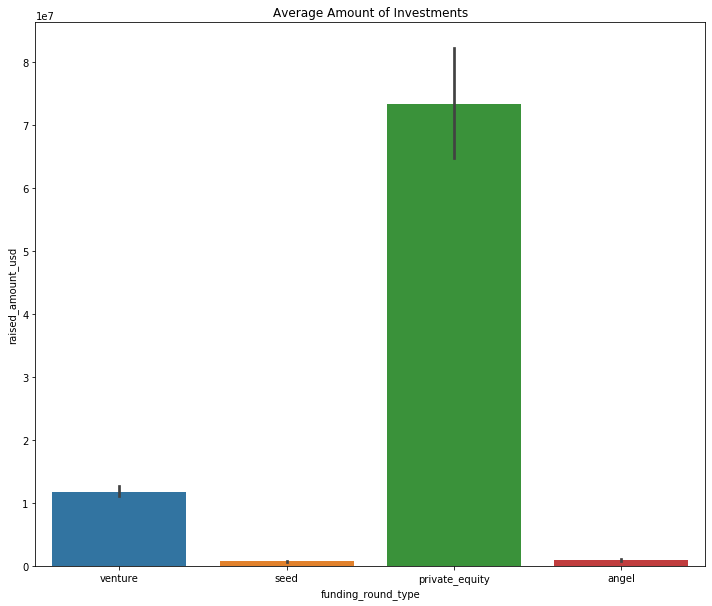

In [107]:
# Bar plot to show the average amount of investment in each funding type globally

plt.figure(figsize=(12, 10))
sns.barplot(y='raised_amount_usd', x='funding_round_type', data=selected_funding_types_df)
plt.title("Average Amount of Investments")
plt.show()

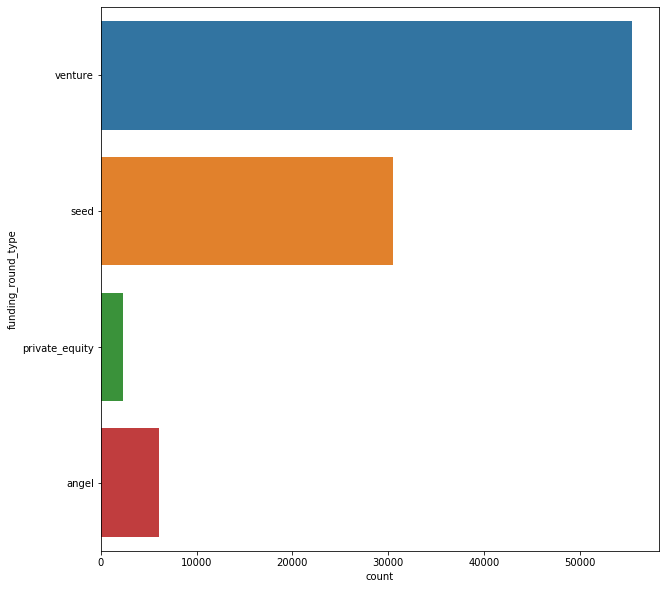

In [108]:
#Bar plot to show the fraction of total investments (globally) in angel, venture, seed, and private equity

plt.figure(figsize=(10, 10))
sns.countplot(y="funding_round_type", data=selected_funding_types_df)
plt.show()

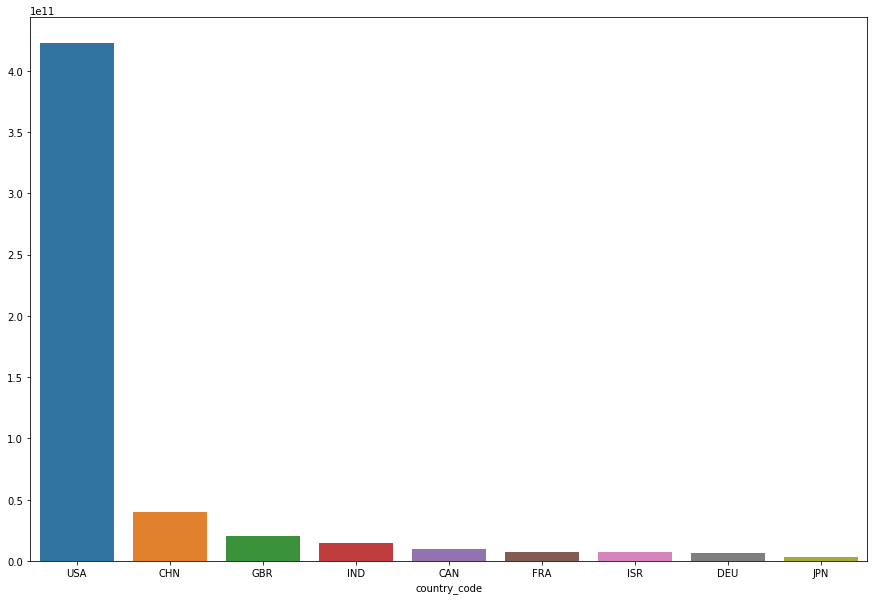

In [109]:

# Since we have already founded the top3 cocuntries from the 'top9' dataframe, 
# We can use the top9 dataframe over here
plt.figure(figsize=(15, 10))
sns.barplot(x=top9.index, y=top9.values.ravel())
plt.show()

The above plot shows the top 3 English Speaking countries as :
    1- USA
    2- GBR
    3- IND

In [110]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
# (for the chosen investment type FT).


In [111]:
# We have already created 3 separate datafrmes for the top 3 countries as below 
# D1 - USA
# D2 - GBR
# D3 - IND

In [112]:
# Using D1, D2, D3 dataframes we get the top 3 sectors from 'main_category'
D1_count=pd.DataFrame((D1.groupby(['main_category']).main_category.count()).sort_values(ascending=False))
D2_count=pd.DataFrame((D2.groupby(['main_category']).main_category.count()).sort_values(ascending=False))
D3_count=pd.DataFrame((D3.groupby(['main_category']).main_category.count()).sort_values(ascending=False))

In [113]:
# Using D1, D2, D3 dataframes we get total invested amount of top 3 countries based on the'main_category'
Amt_D1=pd.DataFrame((D1.groupby(['main_category']).raised_amount_usd.sum()).sort_values(ascending=False))
Amt_D2=pd.DataFrame((D2.groupby(['main_category']).raised_amount_usd.sum()).sort_values(ascending=False))
Amt_D3=pd.DataFrame((D3.groupby(['main_category']).raised_amount_usd.sum()).sort_values(ascending=False))

In [114]:
D1_count.rename(columns={'main_category': 'count'},inplace=True)

In [115]:
D2_count.rename(columns={'main_category': 'count'},inplace=True)
D2_count

,count
main_category,
Others,143
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98
"News, Search and Messaging",73
Entertainment,54
Manufacturing,42
Health,24
Automotive & Sports,16


In [116]:
D3_count.rename(columns={'main_category': 'count'},inplace=True)

In [117]:
D1_sector_total= pd.DataFrame(pd.merge(D1_count, Amt_D1,
                        on='main_category',                        
                        how='inner')).reset_index(drop=False)

In [118]:
D1_sector_total

,main_category,count,raised_amount_usd
0,Others,2923,2.608928e+10
1,Cleantech / Semiconductors,2297,2.118100e+10
2,"Social, Finance, Analytics, Advertising",1912,1.668070e+10
3,"News, Search and Messaging",1563,1.379682e+10
4,Health,908,8.200859e+09
5,Manufacturing,799,7.258553e+09
6,Entertainment,580,5.000213e+09
7,Automotive & Sports,167,1.454104e+09


In [119]:
D2_sector_total= pd.DataFrame(pd.merge(D2_count, Amt_D2,
                        on='main_category',                        
                        how='inner')).reset_index(drop=False)

In [120]:
D2_sector_total.head()

,main_category,count,raised_amount_usd
0,Others,143,1.249124e+09
1,Cleantech / Semiconductors,127,1.136905e+09
2,"Social, Finance, Analytics, Advertising",98,8.218884e+08
3,"News, Search and Messaging",73,6.157462e+08
4,Entertainment,54,4.615111e+08


In [121]:
D3_sector_total= pd.DataFrame(pd.merge(D3_count, Amt_D3,
                        on='main_category',                        
                        how='inner')).reset_index(drop=False)

In [122]:
D3_sector_total

,main_category,count,raised_amount_usd
0,Others,109,1.007410e+09
1,"News, Search and Messaging",52,4.338345e+08
2,Entertainment,33,2.808300e+08
3,"Social, Finance, Analytics, Advertising",32,2.905435e+08
4,Manufacturing,21,2.009000e+08
5,Cleantech / Semiconductors,20,1.653800e+08
6,Health,19,1.677400e+08
7,Automotive & Sports,13,1.369000e+08


In [123]:
 # A dataframe is created to arrange the consolidated values of top 3 countries of top 3 sectors 
 # with the total investments done for each of the top 3 sectors
    
dataframe = pd.DataFrame({
 'country_code':["C1", "C1", "C1", "C2", "C2", "C2", "C3", "C3", "C3"],
    'main_sector':[D1_sector_total.loc[0,'main_category'],D1_sector_total.loc[1,'main_category'],D1_sector_total.loc[2,'main_category'],
                   D2_sector_total.loc[0,'main_category'],D2_sector_total.loc[1,'main_category'],D2_sector_total.loc[2,'main_category'],
                   D3_sector_total.loc[0,'main_category'],D3_sector_total.loc[1,'main_category'],D3_sector_total.loc[2,'main_category']],
    
'number_of_investment':[D1_sector_total.loc[0,'raised_amount_usd'], 
                         D1_sector_total.loc[1,'raised_amount_usd'],
                         D1_sector_total.loc[2,'raised_amount_usd'],
                         D2_sector_total.loc[0,'raised_amount_usd'],
                         D2_sector_total.loc[1,'raised_amount_usd'],
                         D2_sector_total.loc[2,'raised_amount_usd'],
                         D3_sector_total.loc[0,'raised_amount_usd'],
                         D3_sector_total.loc[1,'raised_amount_usd'],                    
                         D3_sector_total.loc[2,'raised_amount_usd']]})

In [124]:
dataframe

,country_code,main_sector,number_of_investment
0,C1,Others,2.608928e+10
1,C1,Cleantech / Semiconductors,2.118100e+10
2,C1,"Social, Finance, Analytics, Advertising",1.668070e+10
3,C2,Others,1.249124e+09
4,C2,Cleantech / Semiconductors,1.136905e+09
5,C2,"Social, Finance, Analytics, Advertising",8.218884e+08
6,C3,Others,1.007410e+09
7,C3,"News, Search and Messaging",4.338345e+08
8,C3,Entertainment,2.808300e+08


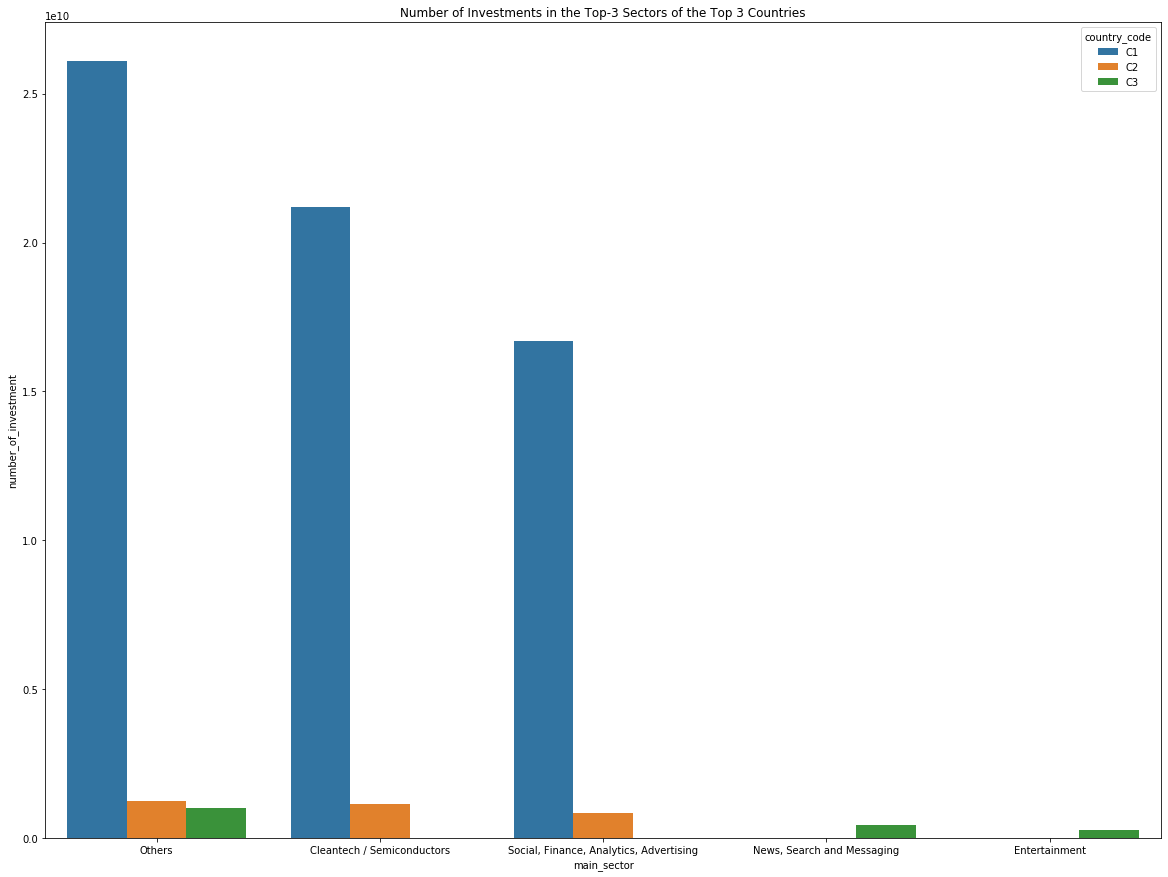

In [125]:
plt.figure(figsize=(20, 15))
sns.barplot(x=dataframe.main_sector, y=dataframe.number_of_investment, hue=dataframe.country_code)
plt.title('Number of Investments in the Top-3 Sectors of the Top 3 Countries')
plt.show()

The above plot shows the number of investments of the top3 sectors in the top 3 countries.